<a href="https://colab.research.google.com/github/serhhpi/bbb/blob/main/test_result.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score, auc
import io
from google.colab import files

In [59]:
# Загрузка размеченных данных для обучения

#uploaded = files.upload()
#train = pd.read_csv(io.BytesIO(uploaded['action_train2.csv']))
train = pd.read_csv("action_train2.csv")

In [60]:
# Загрузка данных

#uploaded = files.upload()
#test = pd.read_csv(io.BytesIO(uploaded['action_test22.csv']))
test = pd.read_csv("action_test2.csv")

In [52]:
test

,Unnamed: 0,action_id,action_type,char_1,char_2,char_3,char_4,char_5,char_6,char_7,char_8,char_9,char_10,year,month,day,dayofweek
0,0,act1_249281,type 1,type 5,type 10,type 5,type 1,type 6,type 1,type 1,type 7,type 4,NaN,2022,7,20,2
1,1,act2_230855,type 5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 682,2022,7,20,2
2,2,act1_240724,type 1,type 12,type 1,type 5,type 4,type 6,type 1,type 1,type 13,type 10,NaN,2022,10,14,4
3,3,act1_83552,type 1,type 20,type 10,type 5,type 4,type 6,type 1,type 1,type 5,type 5,NaN,2022,11,27,6
4,4,act2_1043301,type 5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 3015,2022,10,15,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35245,35245,act2_2368636,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,2022,8,20,5
35246,35246,act2_2388652,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,2023,2,13,0
35247,35247,act2_2411075,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,2022,10,20,3
35248,35248,act2_2476113,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,2022,8,13,5


In [61]:
# Предобработка данных
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

def preprocess(df):
    # Преобразуем дату в числовые признаки
    df['date'] = pd.to_datetime(df['date'])
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    df['day'] = df['date'].dt.day
    df['dayofweek'] = df['date'].dt.dayofweek

    # Удаляем исходные колонки, которые не будем использовать
    return df.drop(['person_id', 'date'], axis=1)

train = preprocess(train)
test = preprocess(test)

# Определяем категориальные и числовые признаки
categorical_cols = ['action_type'] + [f'char_{i}' for i in range(1, 11)]
numeric_cols = ['year', 'month', 'day', 'dayofweek']

# Создаем преобразователь признаков
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

In [79]:
# Подготовка данных
X = train.drop(["action_id", "result"], axis=1)
y = train["result"]
X_test = test.drop("action_id", axis=1)

In [80]:
#Обучение модели
import lightgbm as lgb

#Создаем модель
model = make_pipeline(
    preprocessor,
    lgb.LGBMClassifier(
        n_estimators=500,
        learning_rate=0.05,
        random_state=42,
        class_weight='balanced',
        metric='auc'
    )
)

# Обучаем модель
model.fit(X, y)



/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 68056, number of negative: 120153
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.761044 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1371
[LightGBM] [Info] Number of data points in the train set: 188209, number of used features: 662
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['year', 'month', 'day',
                                                   'dayofweek']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['action_type', 'char_1',
                                                   'char_2', 'char_3', 'char_4',
                                                   'char_5', 'char_6', 'char_7',
                                                   'char_8', 'char_9',
                                                   'char_10'])])),
                ('lgbmclassifier',
                 LGBMClassifier(class_weight='balanced', learning_rate=0.05,
                                metric='auc', n_estimators=500,
                                random_state=42))])

In [81]:
# Предсказываем вероятности
test['result'] = model.predict_proba(X_test)[:, 1]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [82]:
# Сохраняем результаты
results = test[['action_id', 'result']]
results.to_csv('predictions.csv', index=False)

In [87]:
# Оценка модели
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)
model.fit(X_train, y_train)
val_probs = model.predict_proba(X_val)[:, 1]

roc_auc = roc_auc_score(y_val, val_probs)

print(f"AUC-ROC: {roc_auc:.3f}")

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 47435, number of negative: 84311
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.411974 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1059
[LightGBM] [Info] Number of data points in the train set: 131746, number of used features: 506
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


AUC-ROC: 0.798


AUC-ROC: 0.798


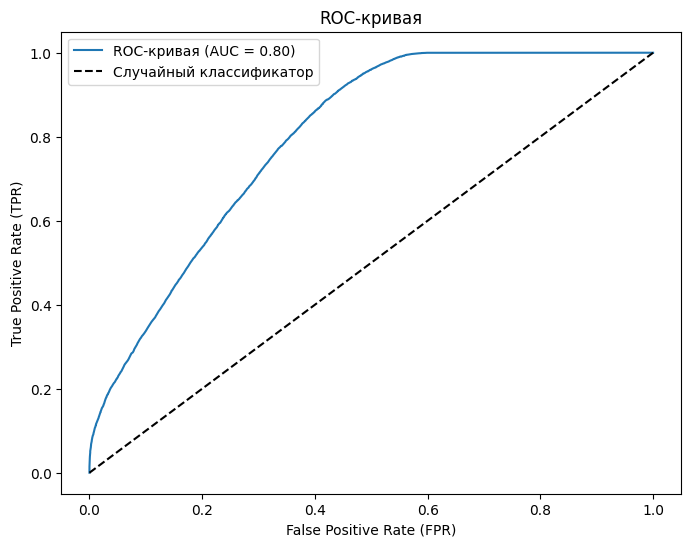

In [88]:
fpr, tpr, thresholds = roc_curve(y_val, val_probs)
roc_auc = roc_auc_score(y_val, val_probs)

print(f"AUC-ROC: {roc_auc:.3f}")

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC-кривая (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Случайный классификатор')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC-кривая')
plt.legend()
plt.show()